## XMAC02 – Trabalho 01
### Nome: Ravel José de Almeida - 2021002495

**Introdução ao Trabalho sobre Estatísticas de Finalização na Premier League**

A Premier League é uma das ligas de futebol mais renomadas e competitivas do mundo, conhecida por seu nível técnico elevado, intensidade de jogo e apaixonante atmosfera nos estádios. Com clubes históricos, jogadores de classe mundial e uma base de fãs global, a Premier League atrai milhões de espectadores a cada temporada, tornando-se um palco ideal para análises estatísticas detalhadas.

**Etapas do Trabalho:**

**Etapa 1 - Definição:**
Nesta etapa, definimos o tema do trabalho como estatísticas de finalização na Premier League. Optamos por análisar todos os jogadores para conseguirmos extrair dados que abrangessem a liga como um todo. As variáveis foram escolhidas para capturar aspectos qualitativos, como posição e nacionalidade dos jogadores, e aspectos quantitativos, como gols marcados, chutes no alvo e eficiência de finalização.

**Etapa 2 - Coleta dos Dados:**
Para garantir a confiabilidade dos dados, selecionamos uma fonte confiável que fornece estatísticas precisas e atualizadas da Premier League. Os dados foram coletados através de um dataset extraído da plataforma Keaggle. Link com o dataset: https://www.kaggle.com/datasets/efaniorimutembo/epl-player-shooting-stats-23-24-premier-league

**Etapa 3 - Organização dos Dados:**
Os dados foram organizados em uma estrutura tabular, permitindo uma fácil compreensão e análise. Além disso, realizamos a limpeza dos dados para remover quaisquer inconsistências ou valores ausentes, garantindo a qualidade dos dados analisados.

**Etapa 4 - Apresentação dos Dados:**
Escolhemos gráficos adequados, como histogramas, gráficos de barras e gráficos de dispersão, para apresentar os dados de forma clara e informativa. Esses gráficos nos ajudarão a visualizar e interpretar as tendências e padrões nas estatísticas de finalização dos jogadores.

**Etapa 5 - Análise dos Resultados:**
Utilizamos medidas de posição, como média e mediana, e medidas de dispersão, como desvio padrão e intervalo interquartil, para analisar os resultados e tirar conclusões objetivas sobre o desempenho dos jogadores na finalização. Além disso, elaboramos uma conclusão descritiva e objetiva com base nos resultados obtidos.

Por meio deste trabalho, buscamos oferecer uma análise abrangente das estatísticas de finalização dos jogadores da Premier League, fornecendo insights valiosos sobre o desempenho individual e coletivo na liga mais emocionante do mundo do futebol.


In [46]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Aqui foi feita uma limpeza no dataset, pois o mesmo apresentava algumas linhas "nulas" preechidas com o valor "Player".

In [47]:
df = pd.read_csv('PremiereLeague23-24.csv')
dfFilter = df[df['Player']!='Player']
dfFilter

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
0,0,1,Max Aarons,ENG,DF,Bournemouth,24.0,2000.0,12.1,0.0,...,0.0,0.0,0.0,0.0,0.0,0.02,0.0,0.0,Matches,May
1,1,2,Bénie Adama Traore,CIV,"FW,MF",Sheffield Utd,21.0,2002.0,4.3,0.0,...,0.0,0.0,0.0,0.3,0.3,0.27,-0.3,-0.3,Matches,April
2,2,3,Tyler Adams,USA,MF,Bournemouth,25.0,1999.0,1.2,0.0,...,0.0,0.0,0.0,0.0,0.0,NaN,0.0,0.0,Matches,July
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
579,579,558,Nicolò Zaniolo,ITA,"MF,FW",Aston Villa,24.0,1999.0,8.3,2.0,...,0.0,0.0,0.0,2.3,2.3,0.09,-0.3,-0.3,Matches,November
580,580,559,Anass Zaroury,MAR,"FW,MF",Burnley,23.0,2000.0,1.7,0.0,...,0.0,0.0,0.0,0.2,0.2,0.06,-0.2,-0.2,Matches,March
581,581,560,Oleksandr Zinchenko,UKR,DF,Arsenal,27.0,1996.0,17.6,1.0,...,0.0,0.0,0.0,0.5,0.5,0.03,0.5,0.5,Matches,May
582,582,561,Kurt Zouma,FRA,DF,West Ham,29.0,1994.0,26.2,3.0,...,0.0,0.0,0.0,1.8,1.8,0.12,1.2,1.2,Matches,March


Com o dataset um pouco mais filtrado, iremos agora destacar algumas informações através de infográficos para que posteriormente possamos fazer análises mais detalhadas.

Vamos separar os infográficos e as análises em dois momentos: o primeiro fazendo uma análise de jogadores e o segundo fazendo uma análise voltada as equipes

Vamos primeiramente gerar dois gráficos, um que nos mostre os 10 jogadores com mais gols no campeonato e outro que nos mostre os 10 jogadores com o maior número de chutes a gol dentro de 90 minutos.

In [48]:
top10Gls = dfFilter.sort_values(by='Gls', ascending=False)
top10Gls = top10Gls.head(10)
top10Gls

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,FK,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month
225,225,218,Erling Haaland,NOR,FW,Manchester City,23.0,2000.0,23.4,19.0,...,1.0,3.0,4.0,21.8,18.7,0.20,-2.8,-2.7,Matches,December
558,558,538,Ollie Watkins,ENG,FW,Aston Villa,28.0,1995.0,30.0,18.0,...,0.0,0.0,0.0,15.0,15.0,0.17,3.0,3.0,Matches,May
474,474,457,Mohamed Salah,EGY,FW,Liverpool,31.0,1992.0,22.8,17.0,...,1.0,5.0,7.0,17.9,12.2,0.15,-0.9,-0.2,Matches,November
502,502,484,Dominic Solanke,ENG,FW,Bournemouth,26.0,1997.0,30.6,16.0,...,0.0,1.0,2.0,17.0,15.4,0.17,-1.0,-0.4,Matches,February
419,419,404,Cole Palmer,ENG,"FW,MF",Chelsea,21.0,2002.0,22.1,16.0,...,5.0,8.0,8.0,12.5,6.1,0.09,3.5,1.9,Matches,September
69,69,68,Jarrod Bowen,ENG,FW,West Ham,27.0,1996.0,30.5,15.0,...,0.0,0.0,0.0,9.7,9.7,0.14,5.3,5.3,Matches,May
250,250,242,Alexander Isak,SWE,FW,Newcastle Utd,24.0,1999.0,18.6,15.0,...,0.0,4.0,4.0,14.4,11.2,0.23,0.6,-0.2,Matches,February
238,238,230,Son Heung-min,KOR,FW,Tottenham,31.0,1992.0,26.0,15.0,...,0.0,1.0,1.0,9.3,8.5,0.12,5.7,5.5,Matches,December
190,190,184,Phil Foden,ENG,"FW,MF",Manchester City,23.0,2000.0,27.2,14.0,...,2.0,0.0,0.0,9.0,9.0,0.10,5.0,5.0,Matches,October
473,473,456,Bukayo Saka,ENG,FW,Arsenal,22.0,2001.0,26.7,14.0,...,0.0,5.0,5.0,12.5,8.6,0.11,1.5,0.4,Matches,January


In [96]:
top10Sh = dfFilter.sort_values(by='SoT/90', ascending=False)
top10Sh = top10Sh[top10Sh['Player']!='Aymeric Laporte']
top10Sh = top10Sh.head(10)
top10ShColumns = ['Player','SoT/90', 'Gls', 'Pos', '90s']
top10Sh = top10Sh[top10ShColumns]
top10Sh

,Player,SoT/90,Gls,Pos,90s
271,Hamed Junior Traorè,3.83,0.0,MF,0.5
118,Philippe Coutinho,3.60,0.0,"MF,FW",0.3
339,Neal Maupay,3.24,0.0,FW,1.2
171,Mohamed Elneny,3.21,0.0,MF,0.3
540,Enes Ünal,2.75,1.0,"FW,MF",1.5
359,Aleksandar Mitrović,2.73,0.0,FW,0.4
459,Matt Ritchie,2.45,1.0,FW,1.2
173,Julio Enciso,2.29,0.0,"MF,FW",2.6
391,Darwin Núñez,2.04,11.0,FW,20.1
140,Amad Diallo,1.87,0.0,FW,0.5


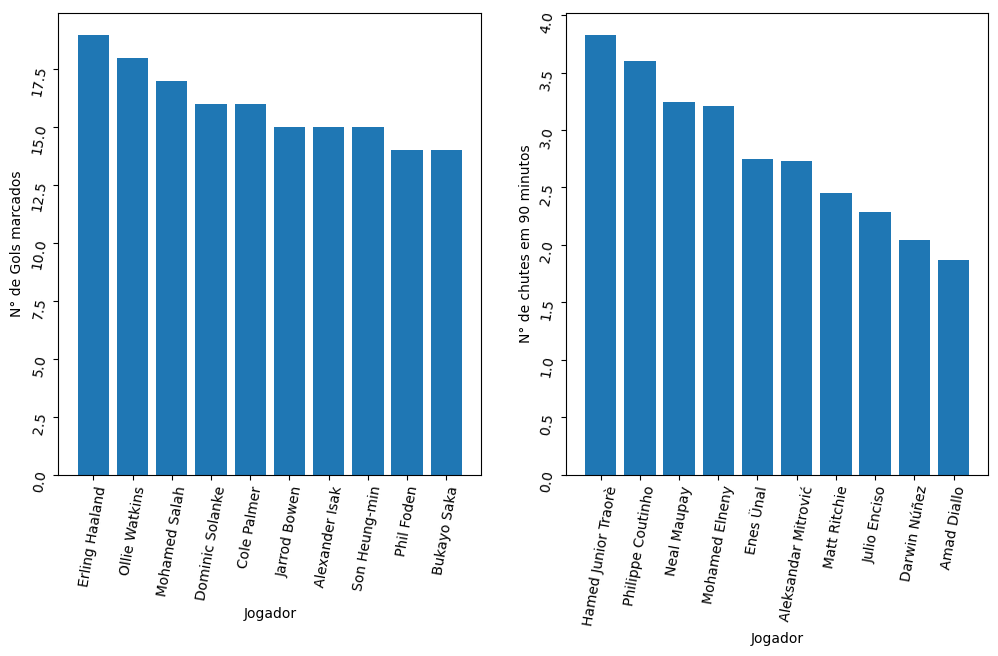

In [97]:
fig, axs = plt.subplots(1, 2, figsize=(12,6))

axs[0].bar(top10Gls['Player'],top10Gls['Gls'])
axs[0].set_xlabel('Jogador')
axs[0].set_ylabel('N° de Gols marcados')
axs[0].tick_params(rotation=80)

axs[1].bar(top10Sh['Player'],top10Sh['SoT/90'])
axs[1].set_xlabel('Jogador')
axs[1].set_ylabel('N° de chutes em 90 minutos')
axs[1].tick_params(rotation=80)

plt.show()

Vamos agora criar uma nova coluna (MinxGls) que nos mostre quantos minutos aproximadamente os jogadores levam para marcar um gol para podermos gerar um gráfico de dispersão para visualizarmos melhor essa informação

In [64]:
dfFilter.loc[:,'MinxGls'] = 90*dfFilter['90s']/dfFilter['Gls']
MinxGls = dfFilter[(dfFilter['MinxGls']!=np.inf) & (~pd.isna(dfFilter['MinxGls']) & (dfFilter['Gls']!=0))].round(2)
MinxGls

,Unnamed: 0,Rk,Player,Nation,Pos,Squad,Age,Born,90s,Gls,...,PK,PKatt,xG,npxG,npxG/Sh,G-xG,np:G-xG,Matches,Birth Month,MinxGls
3,3,4,Tosin Adarabioyo,ENG,DF,Fulham,26.0,1997.0,16.0,2.0,...,0.0,0.0,0.7,0.7,0.05,1.3,1.3,Matches,February,720.00
4,4,5,Elijah Adebayo,ENG,FW,Luton Town,26.0,1998.0,12.9,9.0,...,0.0,0.0,5.6,5.6,0.20,3.4,3.4,Matches,June,129.00
5,5,6,Simon Adingra,CIV,FW,Brighton,22.0,2002.0,18.8,6.0,...,0.0,0.0,3.3,3.3,0.09,2.7,2.7,Matches,May,282.00
6,6,7,Nayef Aguerd,MAR,DF,West Ham,28.0,1996.0,19.6,1.0,...,0.0,0.0,1.5,1.5,0.11,-0.5,-0.5,Matches,August,1764.00
9,9,10,Anel Ahmedhodžić,BIH,DF,Sheffield Utd,25.0,1999.0,23.4,1.0,...,0.0,0.0,2.6,2.6,0.16,-1.6,-1.6,Matches,August,2106.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
578,578,557,Illia Zabarnyi,UKR,DF,Bournemouth,21.0,2002.0,31.0,1.0,...,0.0,0.0,1.1,1.1,0.14,-0.1,-0.1,Matches,January,2790.00
579,579,558,Nicolò Zaniolo,ITA,"MF,FW",Aston Villa,24.0,1999.0,8.3,2.0,...,0.0,0.0,2.3,2.3,0.09,-0.3,-0.3,Matches,November,373.50
581,581,560,Oleksandr Zinchenko,UKR,DF,Arsenal,27.0,1996.0,17.6,1.0,...,0.0,0.0,0.5,0.5,0.03,0.5,0.5,Matches,May,1584.00
582,582,561,Kurt Zouma,FRA,DF,West Ham,29.0,1994.0,26.2,3.0,...,0.0,0.0,1.8,1.8,0.12,1.2,1.2,Matches,March,786.00


Agora vamos gerar um gráfico de dispersão que relacione o tempo médio que os jogadores levam para fazer um gol, com o número de chutes à gol em 90 minutos.

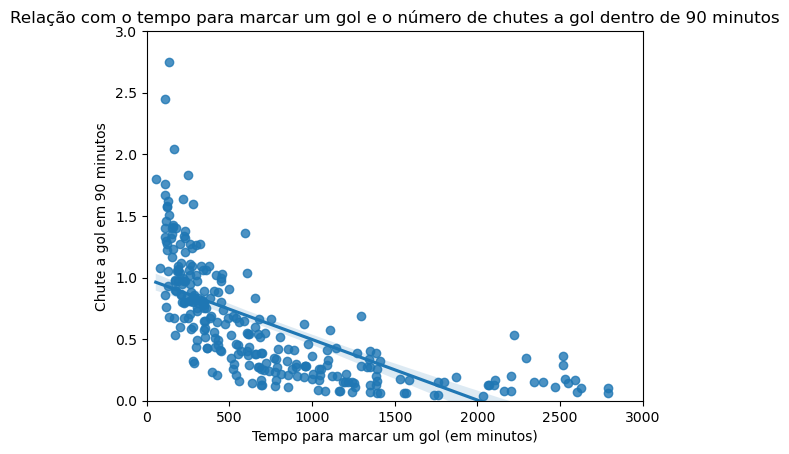

In [63]:
sns.regplot(x='MinxGls', y='SoT/90', fit_reg=True, data=MinxGls)
plt.title('Relação com o tempo para marcar um gol e o número de chutes a gol dentro de 90 minutos')
plt.xlabel('Tempo para marcar um gol (em minutos)')
plt.ylabel('Chute a gol em 90 minutos')
plt.xlim(0, 3000) 
plt.ylim(0, 3)
plt.show()